In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 - The Data

In [1]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
# just to see an example, random number = new object
# plt.imshow(X_train[5]);

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
print(y_train.shape)
print(y_train.max())
print(y_train.min())

(50000, 1)
9
0


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
stopper = EarlyStopping(monitor="val_loss", patience=2)

In [26]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[stopper])

Epoch 1/15
1563/1563 [==============================] - 8s 4ms/step - loss: 1.7167 - accuracy: 0.3717 - val_loss: 1.2470 - val_accuracy: 0.5510
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1931 - accuracy: 0.5775 - val_loss: 1.1197 - val_accuracy: 0.6060
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0263 - accuracy: 0.6395 - val_loss: 1.0591 - val_accuracy: 0.6350
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9135 - accuracy: 0.6779 - val_loss: 1.0305 - val_accuracy: 0.6413
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8067 - accuracy: 0.7197 - val_loss: 0.9995 - val_accuracy: 0.6590
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7358 - accuracy: 0.7411 - val_loss: 0.9736 - val_accuracy: 0.6702
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6583 - accuracy: 0.7683 - val_loss: 0.9774 - val_accuracy:

# Part 2 - Evaluating the Model

In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.499096,0.45954,1.247004,0.5510
1,1.157816,0.59000,1.119745,0.6060
2,1.018500,0.64066,1.059098,0.6350
3,0.912081,0.68076,1.030497,0.6413
4,0.821826,0.71408,0.999455,0.6590
5,0.741444,0.73922,0.973612,0.6702
6,0.666259,0.76550,0.977426,0.6720
7,0.603136,0.78766,0.976760,0.6792


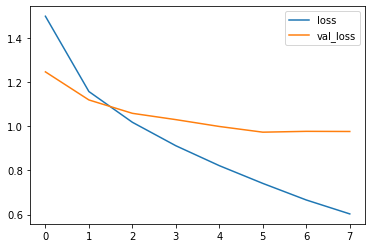

In [32]:
metrics[["loss", "val_loss"]].plot();

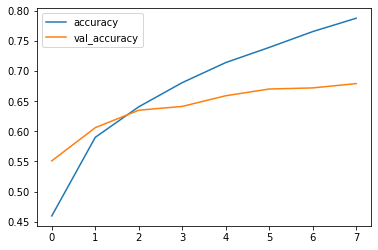

In [31]:
metrics[["accuracy", "val_accuracy"]].plot();

In [33]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.976759672164917, 0.6791999936103821]

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
preds = model.predict_classes(X_test)

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1000
           1       0.73      0.88      0.80      1000
           2       0.66      0.51      0.57      1000
           3       0.48      0.57      0.52      1000
           4       0.61      0.64      0.62      1000
           5       0.64      0.52      0.57      1000
           6       0.78      0.75      0.76      1000
           7       0.64      0.80      0.71      1000
           8       0.80      0.77      0.78      1000
           9       0.78      0.70      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



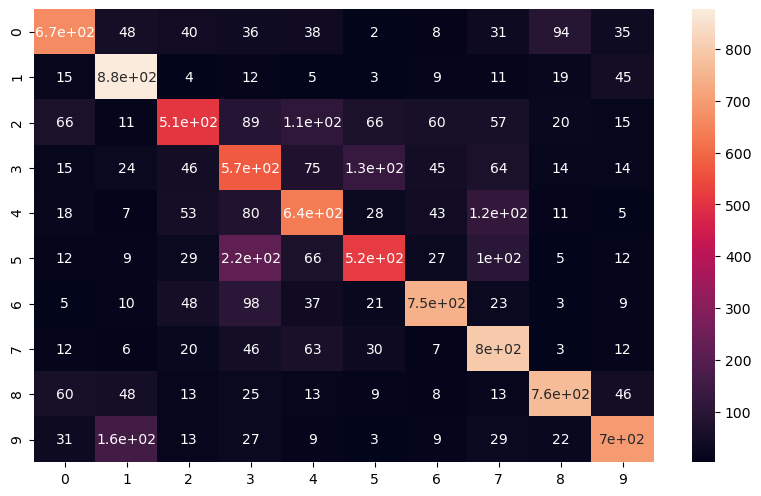

In [39]:
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(confusion_matrix(y_test, preds), annot=True);

In [40]:
# predicting on new image
img = X_test[0]

In [41]:
img.shape

(32, 32, 3)

In [43]:
model.predict_classes(img.reshape(1, 32, 32, 3))

array([3], dtype=int64)

In [44]:
# check prediction on real result
y_test[0]

array([3], dtype=uint8)